In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('.\\mobile\\train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [294]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


- battery power: Total energy a battery can store in one time measured in mAh
- blue: Has bluetooth or not
- clock_speed: Speed at which microprocessor executes instructions
- dual_sim Has dual sim support or not
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of mobile phone
- n_cores: Number of cores of processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Megabytes
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: longest time that a single battery charge will last
- three_g: Has 3G or not
- touch_screen: Has touch screen or not
- wifi: Has wifi or not

In [295]:
df["price_range"].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [297]:
#missing values
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [298]:
from sklearn.model_selection import train_test_split
X = df.drop('price_range', axis=1)
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# SVM

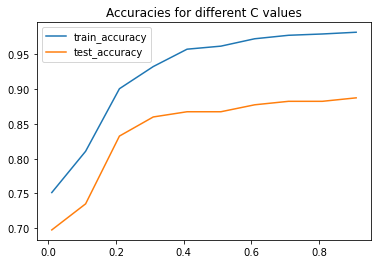

In [272]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

train_hist = []
test_hist = []

r = np.arange(0.01,1,0.1)
for i in r:
    svc_clf = SVC(C=i, random_state=1)
    svc_clf.fit(X_train_std, y_train)
    train_hist.append(svc_clf.score(X_train_std, y_train))
    test_hist.append(svc_clf.score(X_test_std, y_test))

plt.plot(r, train_hist, label='train_accuracy')
plt.plot(r, test_hist, label='test_accuracy')
plt.title("Accuracies for different C values")
plt.legend();

In [273]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.8,0.9,0.95,1]

param_grid = {'svc__C': param_range, 
              'svc__kernel': ['linear', 'rbf']}
              

gs_svc = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy',
                      cv=10, refit=True, n_jobs=-1)

gs_svc = gs_svc.fit(X_train, y_train)

print(f"SVC best params: {gs_svc.best_params_}")
print(f"SVC best score: {gs_svc.best_score_}")
print(f"SVC test accuracy: {gs_svc.score(X_test, y_test)}")

SVC best params: {'svc__C': 1, 'svc__kernel': 'linear'}
SVC best score: 0.9568749999999999
SVC test accuracy: 0.9475


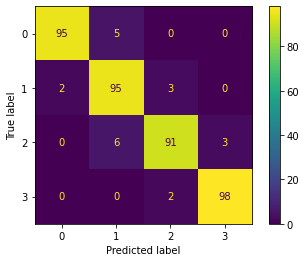

In [274]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gs_svc, X_test, y_test) 

# Random Forest

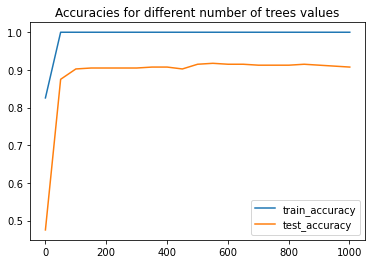

In [275]:
from sklearn.ensemble import RandomForestClassifier

train_hist = []
test_hist = []

r = range(1, 1002, 50)
for i in r:
    rdf_clf = RandomForestClassifier(n_estimators=i, random_state=1)
    rdf_clf.fit(X_train, y_train)
    train_hist.append(rdf_clf.score(X_train, y_train))
    test_hist.append(rdf_clf.score(X_test, y_test))

plt.plot(r, train_hist, label='train_accuracy')
plt.plot(r, test_hist, label='test_accuracy')
plt.title("Accuracies for different number of trees")
plt.legend();

In [276]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1)

#param_range = [2, 3, 4, 5]

param_grid = {
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'n_estimators': [100, 200, 400, 600, 800, 1000], #number of trees
    'max_depth': [50, 100, 150]
}

gs_rf = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, scoring='accuracy',
                  cv=10, n_jobs=-1)

gs_rf = gs_rf.fit(X_train, y_train)
rf_bp = gs_rf.best_params_

print(f"RF best params: {gs_rf.best_params_}")
print(f"RF best score: {gs_rf.best_score_}")
print(f"RF test accuracy: {gs_rf.score(X_test, y_test)}")

RF best params: {'n_estimators': 600, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 150}
RF best score: 0.88375
RF test accuracy: 0.89


In [277]:
rf_bp = gs_rf.best_params_

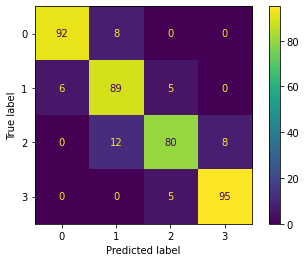

In [278]:
plot_confusion_matrix(gs_rf, X_test, y_test) 

# XGBoost

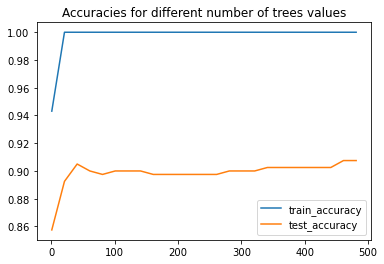

In [279]:
from xgboost import XGBClassifier
import xgboost
from sklearn.metrics import accuracy_score

xgboost.set_config(verbosity=0)
train_hist = []
test_hist = []

r = range(1, 500, 20)
for i in r:
  
    xgb_clf = XGBClassifier(n_estimators=i, random_state=1, use_label_encoder=False)
    xgb_clf.fit(X_train, y_train)
    #train_hist.append(xgb_clf.score(X_train, y_train))
    #test_hist.append(xgb_clf.score(X_test, y_test))
    pred_train = xgb_clf.predict(X_train)
    pred_test = xgb_clf.predict(X_test)
    train_hist.append(accuracy_score(y_train, pred_train))
    test_hist.append(accuracy_score(y_test, pred_test))


plt.plot(r, train_hist, label='train_accuracy')
plt.plot(r, test_hist, label='test_accuracy')
plt.title("Accuracies for different number of trees")
plt.legend()

In [280]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

clf_xgb = XGBClassifier()

param_grid = {
    "n_estimators": [150,250,270,300,400],
    "learning_rate": [0.1,0.2, 0.3,0.4,0.5,1],
    "gamma": [0, 0.1, 0.25, 1],
   
}

gs_xgb = GridSearchCV(clf_xgb, param_grid, n_jobs=-1, cv=3, scoring='accuracy')

gs_xgb = gs_xgb.fit(X_train, y_train)

print(f"XGB best params: {gs_xgb.best_params_}")
print(f"XGB best score: {gs_xgb.best_score_}")
print(f"XGB test accuracy: {gs_xgb.score(X_test, y_test)}")

C:\Users\grzes\Desktop\python\ML\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RF best params: {'gamma': 0, 'learning_rate': 0.4, 'n_estimators': 400}
XGB best score: 0.9012479709931066
XGB test accuracy: 0.905


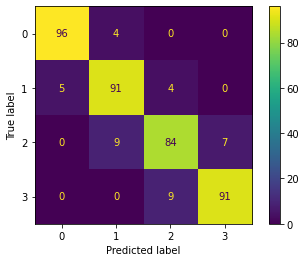

In [281]:
plot_confusion_matrix(gs_xgb, X_test, y_test) 

# KNN

In [282]:
from sklearn.neighbors import KNeighborsClassifier

train_hist = []
test_hist = []
train_hist_sc = []
test_hist_sc = []

r = range(1, 10)
for i in r:
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(X_train, y_train)
    train_hist.append(knn_clf.score(X_train, y_train))
    test_hist.append(knn_clf.score(X_test, y_test))
    

for i in r:
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(X_train_std, y_train)
    train_hist_sc.append(knn_clf.score(X_train_std, y_train))
    test_hist_sc.append(knn_clf.score(X_test_std, y_test))

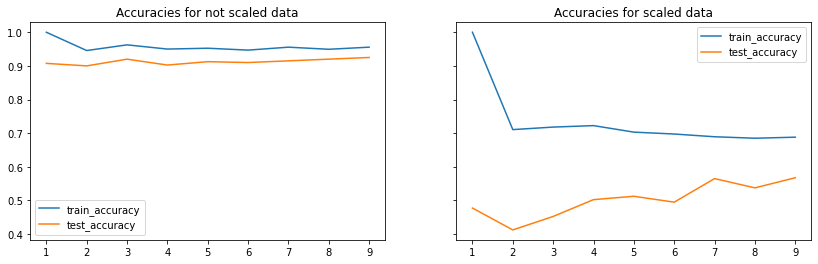

In [283]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4), sharey=True)
ax1.plot(r, train_hist, label='train_accuracy')
ax1.plot(r, test_hist, label='test_accuracy')
ax1.set_title('Accuracies for not scaled data')
ax1.legend()
ax2.plot(r, train_hist_sc, label='train_accuracy')
ax2.plot(r, test_hist_sc, label='test_accuracy')
ax2.legend()
ax2.set_title('Accuracies for scaled data');

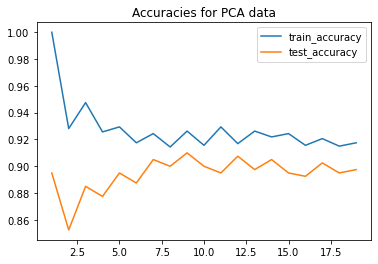

In [319]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.fit_transform(X_test_pca)

train_hist_pca = []
test_hist_pca = []

r = range(1, 20)
for i in r:
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(X_train_pca, y_train)
    train_hist_pca.append(knn_clf.score(X_train_pca, y_train))
    test_hist_pca.append(knn_clf.score(X_test_pca, y_test))

    
plt.plot(r, train_hist_pca, label='train_accuracy')
plt.plot(r, test_hist_pca, label='test_accuracy')
plt.title('Accuracies for PCA data')
plt.legend();

In [285]:
rfc = RandomForestClassifier(**rf_bp)
rf = rfc.fit(X_train, y_train)

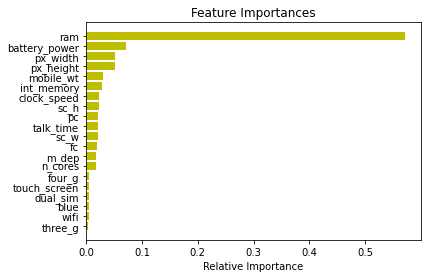

In [286]:
features = df.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [304]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(rdf_clf, prefit=True)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)
X_train_new.shape               

(1600, 4)

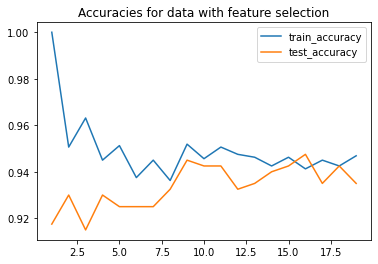

In [305]:
train_hist_fs = []
test_hist_fs = []

r = range(1, 20)
for i in r:
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(X_train_new, y_train)
    train_hist_fs.append(knn_clf.score(X_train_new, y_train))
    test_hist_fs.append(knn_clf.score(X_test_new, y_test))
    
    
plt.plot(r, train_hist_fs, label='train_accuracy')
plt.plot(r, test_hist_fs, label='test_accuracy')
plt.title('Accuracies for data with feature selection')
plt.legend();

In [307]:
knn_clf = KNeighborsClassifier(n_neighbors=16)
knn_clf.fit(X_train_new, y_train)
print(f"KNN train accuracy: {knn_clf.score(X_train_new, y_train)} ")
print(f"KNN test accuracy: {knn_clf.score(X_test_new, y_test)} ")

KNN train accuracy: 0.94125 
KNN test accuracy: 0.9475 


In [311]:
scaler = StandardScaler()
X_train_std_new = scaler.fit_transform(X_train_new)
X_test_std_new = scaler.fit_transform(X_test_new)

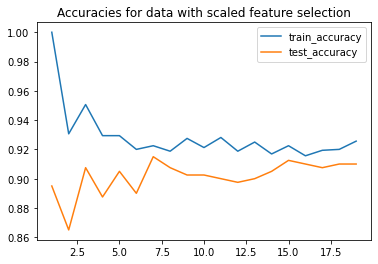

In [323]:
train_hist_fs_sc = []
test_hist_fs_sc = []

r = range(1, 20)
for i in r:
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(X_train_std_new, y_train)
    train_hist_fs_sc.append(knn_clf.score(X_train_std_new, y_train))
    test_hist_fs_sc.append(knn_clf.score(X_test_std_new, y_test))
    
    
plt.plot(r, train_hist_fs_sc, label='train_accuracy')
plt.plot(r, test_hist_fs_sc, label='test_accuracy')
plt.title('Accuracies for data with scaled feature selection')
plt.legend();

In [320]:
knn_clf = KNeighborsClassifier(n_neighbors=16)
knn_clf.fit(X_train_std_new, y_train)
print(f"KNN train accuracy: {knn_clf.score(X_train_std_new, y_train)} ")
print(f"KNN test accuracy: {knn_clf.score(X_test_std_new, y_test)} ")

KNN train accuracy: 0.915625 
KNN test accuracy: 0.91 


# Summary

In [326]:
import pandas as pd

clfs = ['SVM','RF','XGB','KNN','NN']
row_names = ['train_acc', 'test_acc']
train_acc = [0.96, 0.89, 0.91, 0.95, 0.99]
test_acc = [0.97, 0.86, 0.92, 0.95, 0.95] 

df = pd.DataFrame(data=[train_acc, test_acc], columns=clfs, index=row_names)
df

,SVM,RF,XGB,KNN,NN
train_acc,0.96,0.89,0.91,0.95,0.99
test_acc,0.97,0.86,0.92,0.95,0.95


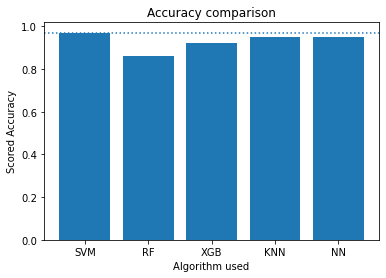

In [327]:
import matplotlib.pyplot as plt

plt.bar(clfs, test_acc, label='test_acc')
plt.axhline(max(test_acc), ls=':')
plt.xlabel('Algorithm used')
plt.ylabel('Scored Accuracy')
plt.title('Accuracy comparison')
plt.show()